In [42]:
## Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns',None)

In [43]:
## load players xG dataset in open play (fastbreak + regular) (see data_spec.txt)
players_xg = pd.read_csv('../data/players_xG1.csv')
## load players xPass dataset in the attacking third (see data_spec.txt)
players_xp = pd.read_csv('../data/players_xP6.csv')

In [44]:
players_xg.columns

Index(['Player', 'Team', 'Season', 'MinutesIncludes stoppage time.', 'Shots',
       'SoTShots on Target', 'GGoals', 'xGxGoals',
       'xPlaceDifference between post- and pre-shot xG models.', 'G-xG',
       'KeyPKey Passes', 'APrimary Assists', 'xAxAssists', 'A-xA', 'xG+xA',
       'PAExpected points added through scoring goals.',
       'xPAExpected points added through taking shots.'],
      dtype='object')

In [45]:
## we clean the column names
players_xg = players_xg.rename(columns={'MinutesIncludes stoppage time.':'Minutes','SoTShots on Target':'SoTShots','xPlaceDifference between post- and pre-shot xG models.':'xPlaceDifference','KeyPKey Passes':'KeyPKey','APrimary Assists':'APrimary','PAExpected points added through scoring goals.':'PAExpected','xPAExpected points added through taking shots.':'xPAExpected'})

In [46]:
players_xg.columns

Index(['Player', 'Team', 'Season', 'Minutes', 'Shots', 'SoTShots', 'GGoals',
       'xGxGoals', 'xPlaceDifference', 'G-xG', 'KeyPKey', 'APrimary',
       'xAxAssists', 'A-xA', 'xG+xA', 'PAExpected', 'xPAExpected'],
      dtype='object')

In [47]:
players_xp.columns

Index(['Player', 'Team', 'Season', 'MinutesIncludes stoppage time.', 'Passes',
       'Pass %Pass Completion', 'xPass %Expected pass completion percentage.',
       'ScoreNumber of passes completed over/under expected.',
       'Per100Passes completed over/under expected, measured per 100 passes.',
       'DistanceAverage distance of completed passes, measured in yards. Assumes 115x80 field dimensions.',
       'VerticalAverage vertical distance of completed passes, measured in yards. Assumes 115x80 field dimensions.',
       'Touch %Players' share of their team's number of touches.'],
      dtype='object')

In [48]:
## we clean the column names
players_xp = players_xp.rename(columns={'MinutesIncludes stoppage time.':'Minutes','Pass %Pass Completion':'%Pass','xPass %Expected pass completion percentage.':'%ExpectedPass','ScoreNumber of passes completed over/under expected.':'Score','Per100Passes completed over/under expected, measured per 100 passes.':'Per100Passes','DistanceAverage distance of completed passes, measured in yards. Assumes 115x80 field dimensions.':'DistanceAverage','VerticalAverage vertical distance of completed passes, measured in yards. Assumes 115x80 field dimensions.':'VerticalAverage',"Touch %Players' share of their team's number of touches.":'Touch %Players'})

In [49]:
players_xp.columns

Index(['Player', 'Team', 'Season', 'Minutes', 'Passes', '%Pass',
       '%ExpectedPass', 'Score', 'Per100Passes', 'DistanceAverage',
       'VerticalAverage', 'Touch %Players'],
      dtype='object')

In [50]:
## let's merge both datasets players_xG and players_xP
players = pd.merge(players_xp,players_xg,how='left',on=['Player', 'Team', 'Season', 'Minutes'])

In [51]:
players_xp.shape

(4066, 12)

In [52]:
players.isnull().sum()
## some players are missing in the players_xg dataset

Player                0
Team                  0
Season                0
Minutes               0
Passes                0
%Pass                 0
%ExpectedPass         0
Score                 0
Per100Passes          0
DistanceAverage       0
VerticalAverage       0
Touch %Players        0
Shots               492
SoTShots            492
GGoals              492
xGxGoals            492
xPlaceDifference    492
G-xG                492
KeyPKey             492
APrimary            492
xAxAssists          492
A-xA                492
xG+xA               492
PAExpected          492
xPAExpected         492
dtype: int64

In [53]:
players[players['Shots'].isnull()]['Minutes'].mean()
## the players missing have low minutes (530) on average, they wouldn't make the cut anyway

529.810975609756

In [54]:
players = players.dropna()

In [55]:
players.isnull().any().sum()

0

In [56]:
players.shape

(3574, 25)

In [57]:
players.head()

,Player,Team,Season,Minutes,Passes,%Pass,%ExpectedPass,Score,Per100Passes,DistanceAverage,VerticalAverage,Touch %Players,Shots,SoTShots,GGoals,xGxGoals,xPlaceDifference,G-xG,KeyPKey,APrimary,xAxAssists,A-xA,xG+xA,PAExpected,xPAExpected
0,Nicolás Lodeiro,SEA,2018,2644,823,0.7205,0.6726,39.4752,4.7965,21.3082,1.8263,0.2205,43.0,10.0,2.0,2.5782,-1.0454,-0.5782,48.0,7.0,5.3182,1.6818,7.8963,1.3146,1.4113
1,Darlington Nagbe,POR,2015,3015,528,0.8485,0.7863,32.8084,6.2137,16.5601,1.6771,0.1413,45.0,15.0,4.0,2.5588,0.2696,1.4412,58.0,4.0,5.5735,-1.5735,8.1323,1.7431,1.6154
2,Chris Tierney,NER,2015,2812,710,0.6662,0.6204,32.5005,4.5775,22.9067,0.9692,0.1485,15.0,8.0,2.0,1.0189,1.3750,0.9811,33.0,2.0,4.5971,-2.5971,5.6160,0.6913,0.4921
3,Brad Davis,HOU,2013,2326,512,0.6914,0.6312,30.8432,6.0241,22.2654,-0.2576,0.1711,32.0,13.0,2.0,1.7965,1.0525,0.2035,21.0,5.0,2.7976,2.2024,4.5941,2.2135,1.2635
4,Haris Medunjanin,PHI,2019,3374,553,0.6980,0.6422,30.8358,5.5761,25.2778,6.2682,0.0983,18.0,3.0,0.0,0.4939,-0.3346,-0.4939,33.0,3.0,2.9098,0.0902,3.4037,0.0000,0.3492


In [58]:
players.columns

Index(['Player', 'Team', 'Season', 'Minutes', 'Passes', '%Pass',
       '%ExpectedPass', 'Score', 'Per100Passes', 'DistanceAverage',
       'VerticalAverage', 'Touch %Players', 'Shots', 'SoTShots', 'GGoals',
       'xGxGoals', 'xPlaceDifference', 'G-xG', 'KeyPKey', 'APrimary',
       'xAxAssists', 'A-xA', 'xG+xA', 'PAExpected', 'xPAExpected'],
      dtype='object')

In [59]:
## we create 'teams' dataset by aggregating 'players' dataset 
teams = players.groupby(['Team','Season']).agg({'xAxAssists':'sum','xGxGoals':'sum','%ExpectedPass':'mean','Score':'mean','xG+xA':'sum','Per100Passes':'mean','KeyPKey':'sum','GGoals':'sum','Passes':'sum','%Pass':'mean'}).reset_index()[['Team','Season','xAxAssists','xGxGoals','%ExpectedPass','Score','xG+xA','Per100Passes','KeyPKey','GGoals']]

In [60]:
## we create the feature 'xA/KeyP' to measure the quality of key passes 
teams['xA/KeyP'] = teams['xAxAssists']/teams['KeyPKey']

In [61]:
teams.columns

Index(['Team', 'Season', 'xAxAssists', 'xGxGoals', '%ExpectedPass', 'Score',
       'xG+xA', 'Per100Passes', 'KeyPKey', 'GGoals', 'xA/KeyP'],
      dtype='object')

In [62]:
## we exclude season 2020 to keep only complete regular seasons from 2013 to 2019
## each team plays 34 matches each season in the regular season
teams = teams[teams['Season']!=2020]

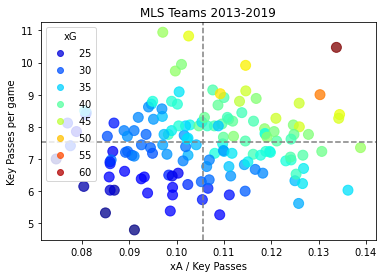

In [103]:
## we separate teams according to their volume and quality of key passes
plt.rcParams["image.cmap"] = "jet"
fig, ax = plt.subplots()
scatter = ax.scatter(teams['xA/KeyP'],teams['KeyPKey']/34,c=teams['xGxGoals'],s=100,alpha=0.75)
ax.axhline(y=teams['KeyPKey'].mean()/34, color='grey', linestyle='--')
ax.axvline(x=teams['xA/KeyP'].mean(), color='grey', linestyle='--')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="xG")
plt.title('MLS Teams 2013-2019')
plt.xlabel('xA / Key Passes')
plt.ylabel('Key Passes per game')
plt.show()
## each point of the graph is a team in a given season
## the dotted line is the average of the corresponding variable
## 4 quadrants: (1) low quantity low quality (bottom left), (2) high quantity low quality (top left), (3) low quantity high quality (bottom right) and (4) high quantity high quality (top right)
## the higher the volume and quality of key passes the higher the expected goals of every team

In [64]:
## now let's see only 2019 season
teams_2019 = teams[teams['Season']==2019]

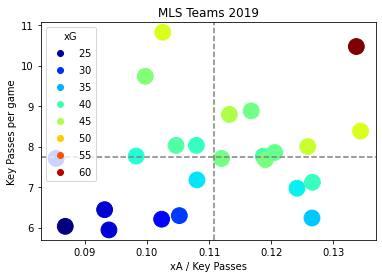

In [105]:
plt.rcParams["image.cmap"] = "jet"
fig, ax = plt.subplots()
scatter = ax.scatter(teams_2019['xA/KeyP'],teams_2019['KeyPKey']/34,c=teams_2019['xGxGoals'],s=250)
ax.axhline(y=teams_2019['KeyPKey'].mean()/34, color='gray', linestyle='--')
ax.axvline(x=teams_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="xG")
plt.title('MLS Teams 2019')
plt.xlabel('xA / Key Passes')
plt.ylabel('Key Passes per game')
plt.show()

In [66]:
## Let's see the teams in the bottom left quadrant
teams_2019[(teams_2019['KeyPKey']<teams_2019['KeyPKey'].mean()) & (teams_2019['xA/KeyP']<teams_2019['xA/KeyP'].mean())]['Team']

14     CIN
22     CLB
30     COL
38     DCU
78     MTL
131    RSL
171    VAN
Name: Team, dtype: object

In [94]:
## now that we have a shortlist of teams with room to improve the quantity and quality of key passes, let's see their players
## we load the data set players_salaries because it has the position of every player
players_salaries = pd.read_csv('../data/players_salaries.csv')
players = pd.merge(players,players_salaries,how='left',on=['Player','Team','Season'])

In [133]:
players_M_2019 = players_M_2019.drop(['Date'],1)
players_M_2019 = players_M_2019.drop_duplicates()

In [134]:
## we will consider only midfielders with more than 680 minutes on the pitch during the season (roughly 20 minutes per game per season, as every team plays 34 matches during the regular season)
players_M_2019 = players[(players['Minutes']>680)&(players['Season']==2019)&(players['Position']=='M')]

In [135]:
## we adjust the variables to show per 90 minutes values
players_M_2019['KeyP_p90'] = players_M_2019['KeyPKey'] / players_M_2019['Minutes'] * 90
players_M_2019['xA_p90'] = players_M_2019['xAxAssists'] / players_M_2019['Minutes'] * 90
players_M_2019['xA/KeyP'] = players_M_2019['xA_p90'] / players_M_2019['KeyP_p90']

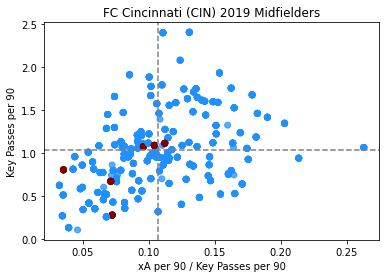

In [136]:
## CIN 
fig, ax = plt.subplots()
colors = {'PHI':'dodgerblue', 'SJE':'dodgerblue', 'ATL':'dodgerblue', 'ORL':'dodgerblue', 'CHI':'dodgerblue', 'LAG':'dodgerblue', 'SEA':'dodgerblue', 'POR':'dodgerblue', 'RSL':'dodgerblue','TOR':'dodgerblue', 'LAFC':'dodgerblue', 'HOU':'dodgerblue', 'COL':'dodgerblue', 'VAN':'dodgerblue', 'FCD':'dodgerblue', 'NYRB':'dodgerblue', 'MTL':'dodgerblue', 'SKC':'dodgerblue','NYC':'dodgerblue', 'MIN':'dodgerblue', 'DCU':'dodgerblue', 'CIN':'maroon', 'NER':'dodgerblue', 'CLB':'dodgerblue'}
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c=players_M_2019['Team'].apply(lambda x: colors[x]),alpha=0.75)
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('FC Cincinnati (CIN) 2019 Midfielders')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()

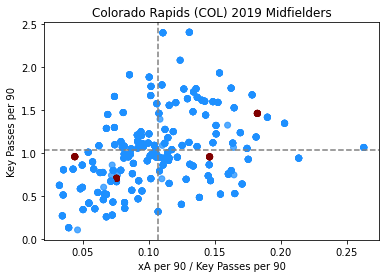

In [137]:
## COL 
fig, ax = plt.subplots()
colors = {'PHI':'dodgerblue', 'SJE':'dodgerblue', 'ATL':'dodgerblue', 'ORL':'dodgerblue', 'CHI':'dodgerblue', 'LAG':'dodgerblue', 'SEA':'dodgerblue', 'POR':'dodgerblue', 'RSL':'dodgerblue','TOR':'dodgerblue', 'LAFC':'dodgerblue', 'HOU':'dodgerblue', 'COL':'maroon', 'VAN':'dodgerblue', 'FCD':'dodgerblue', 'NYRB':'dodgerblue', 'MTL':'dodgerblue', 'SKC':'dodgerblue','NYC':'dodgerblue', 'MIN':'dodgerblue', 'DCU':'dodgerblue', 'CIN':'dodgerblue', 'NER':'dodgerblue', 'CLB':'dodgerblue'}
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c=players_M_2019['Team'].apply(lambda x: colors[x]),alpha=0.75)
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('Colorado Rapids (COL) 2019 Midfielders')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()

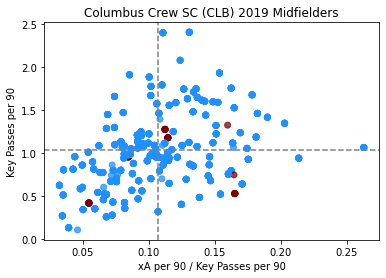

In [116]:
## CLB 
fig, ax = plt.subplots()
colors = {'PHI':'dodgerblue', 'SJE':'dodgerblue', 'ATL':'dodgerblue', 'ORL':'dodgerblue', 'CHI':'dodgerblue', 'LAG':'dodgerblue', 'SEA':'dodgerblue', 'POR':'dodgerblue', 'RSL':'dodgerblue','TOR':'dodgerblue', 'LAFC':'dodgerblue', 'HOU':'dodgerblue', 'COL':'dodgerblue', 'VAN':'dodgerblue', 'FCD':'dodgerblue', 'NYRB':'dodgerblue', 'MTL':'dodgerblue', 'SKC':'dodgerblue','NYC':'dodgerblue', 'MIN':'dodgerblue', 'DCU':'dodgerblue', 'CIN':'dodgerblue', 'NER':'dodgerblue', 'CLB':'maroon'}
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c=players_M_2019['Team'].apply(lambda x: colors[x]),alpha=0.75)
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('Columbus Crew SC (CLB) 2019 Midfielders')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()

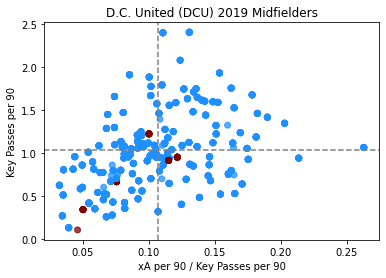

In [118]:
## DCU 
fig, ax = plt.subplots()
colors = {'PHI':'dodgerblue', 'SJE':'dodgerblue', 'ATL':'dodgerblue', 'ORL':'dodgerblue', 'CHI':'dodgerblue', 'LAG':'dodgerblue', 'SEA':'dodgerblue', 'POR':'dodgerblue', 'RSL':'dodgerblue','TOR':'dodgerblue', 'LAFC':'dodgerblue', 'HOU':'dodgerblue', 'COL':'dodgerblue', 'VAN':'dodgerblue', 'FCD':'dodgerblue', 'NYRB':'dodgerblue', 'MTL':'dodgerblue', 'SKC':'dodgerblue','NYC':'dodgerblue', 'MIN':'dodgerblue', 'DCU':'maroon', 'CIN':'dodgerblue', 'NER':'dodgerblue', 'CLB':'dodgerblue'}
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c=players_M_2019['Team'].apply(lambda x: colors[x]),alpha=0.75)
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('D.C. United (DCU) 2019 Midfielders')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()

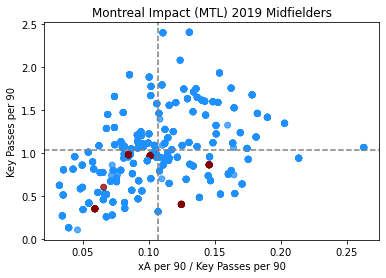

In [119]:
## MTL 
fig, ax = plt.subplots()
colors = {'PHI':'dodgerblue', 'SJE':'dodgerblue', 'ATL':'dodgerblue', 'ORL':'dodgerblue', 'CHI':'dodgerblue', 'LAG':'dodgerblue', 'SEA':'dodgerblue', 'POR':'dodgerblue', 'RSL':'dodgerblue','TOR':'dodgerblue', 'LAFC':'dodgerblue', 'HOU':'dodgerblue', 'COL':'dodgerblue', 'VAN':'dodgerblue', 'FCD':'dodgerblue', 'NYRB':'dodgerblue', 'MTL':'maroon', 'SKC':'dodgerblue','NYC':'dodgerblue', 'MIN':'dodgerblue', 'DCU':'dodgerblue', 'CIN':'dodgerblue', 'NER':'dodgerblue', 'CLB':'dodgerblue'}
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c=players_M_2019['Team'].apply(lambda x: colors[x]),alpha=0.75)
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('Montreal Impact (MTL) 2019 Midfielders')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()

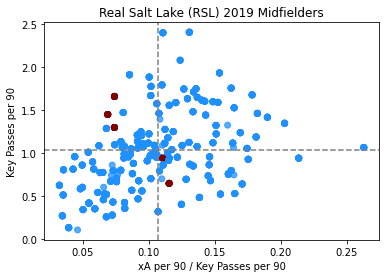

In [121]:
## RSL 
fig, ax = plt.subplots()
colors = {'PHI':'dodgerblue', 'SJE':'dodgerblue', 'ATL':'dodgerblue', 'ORL':'dodgerblue', 'CHI':'dodgerblue', 'LAG':'dodgerblue', 'SEA':'dodgerblue', 'POR':'dodgerblue', 'RSL':'maroon','TOR':'dodgerblue', 'LAFC':'dodgerblue', 'HOU':'dodgerblue', 'COL':'dodgerblue', 'VAN':'dodgerblue', 'FCD':'dodgerblue', 'NYRB':'dodgerblue', 'MTL':'dodgerblue', 'SKC':'dodgerblue','NYC':'dodgerblue', 'MIN':'dodgerblue', 'DCU':'dodgerblue', 'CIN':'dodgerblue', 'NER':'dodgerblue', 'CLB':'dodgerblue'}
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c=players_M_2019['Team'].apply(lambda x: colors[x]),alpha=0.75)
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('Real Salt Lake (RSL) 2019 Midfielders')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()

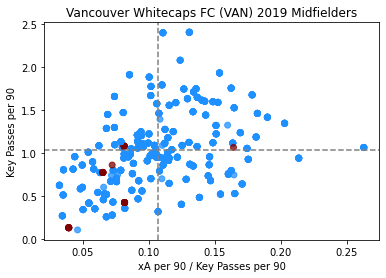

In [122]:
## VAN 
fig, ax = plt.subplots()
colors = {'PHI':'dodgerblue', 'SJE':'dodgerblue', 'ATL':'dodgerblue', 'ORL':'dodgerblue', 'CHI':'dodgerblue', 'LAG':'dodgerblue', 'SEA':'dodgerblue', 'POR':'dodgerblue', 'RSL':'dodgerblue','TOR':'dodgerblue', 'LAFC':'dodgerblue', 'HOU':'dodgerblue', 'COL':'dodgerblue', 'VAN':'maroon', 'FCD':'dodgerblue', 'NYRB':'dodgerblue', 'MTL':'dodgerblue', 'SKC':'dodgerblue','NYC':'dodgerblue', 'MIN':'dodgerblue', 'DCU':'dodgerblue', 'CIN':'dodgerblue', 'NER':'dodgerblue', 'CLB':'dodgerblue'}
scatter = ax.scatter(players_M_2019['xA/KeyP'],players_M_2019['KeyP_p90'],c=players_M_2019['Team'].apply(lambda x: colors[x]),alpha=0.75)
ax.axhline(y=players_M_2019['KeyP_p90'].mean(), color='gray', linestyle='--')
ax.axvline(x=players_M_2019['xA/KeyP'].mean(), color='gray', linestyle='--')
plt.title('Vancouver Whitecaps FC (VAN) 2019 Midfielders')
plt.xlabel('xA per 90 / Key Passes per 90')
plt.ylabel('Key Passes per 90')
plt.show()

In [ ]:
## from all the graphs, MTL is the team with more room to improve the quantity and quality of key passes, because they don't have any player in the top right quadrant and have only 2 midfielders in the bottom right quadrant.
## thereby I'm taking control of MTL to strengthen its midfield, more specifically its capacity to create more and better key passes